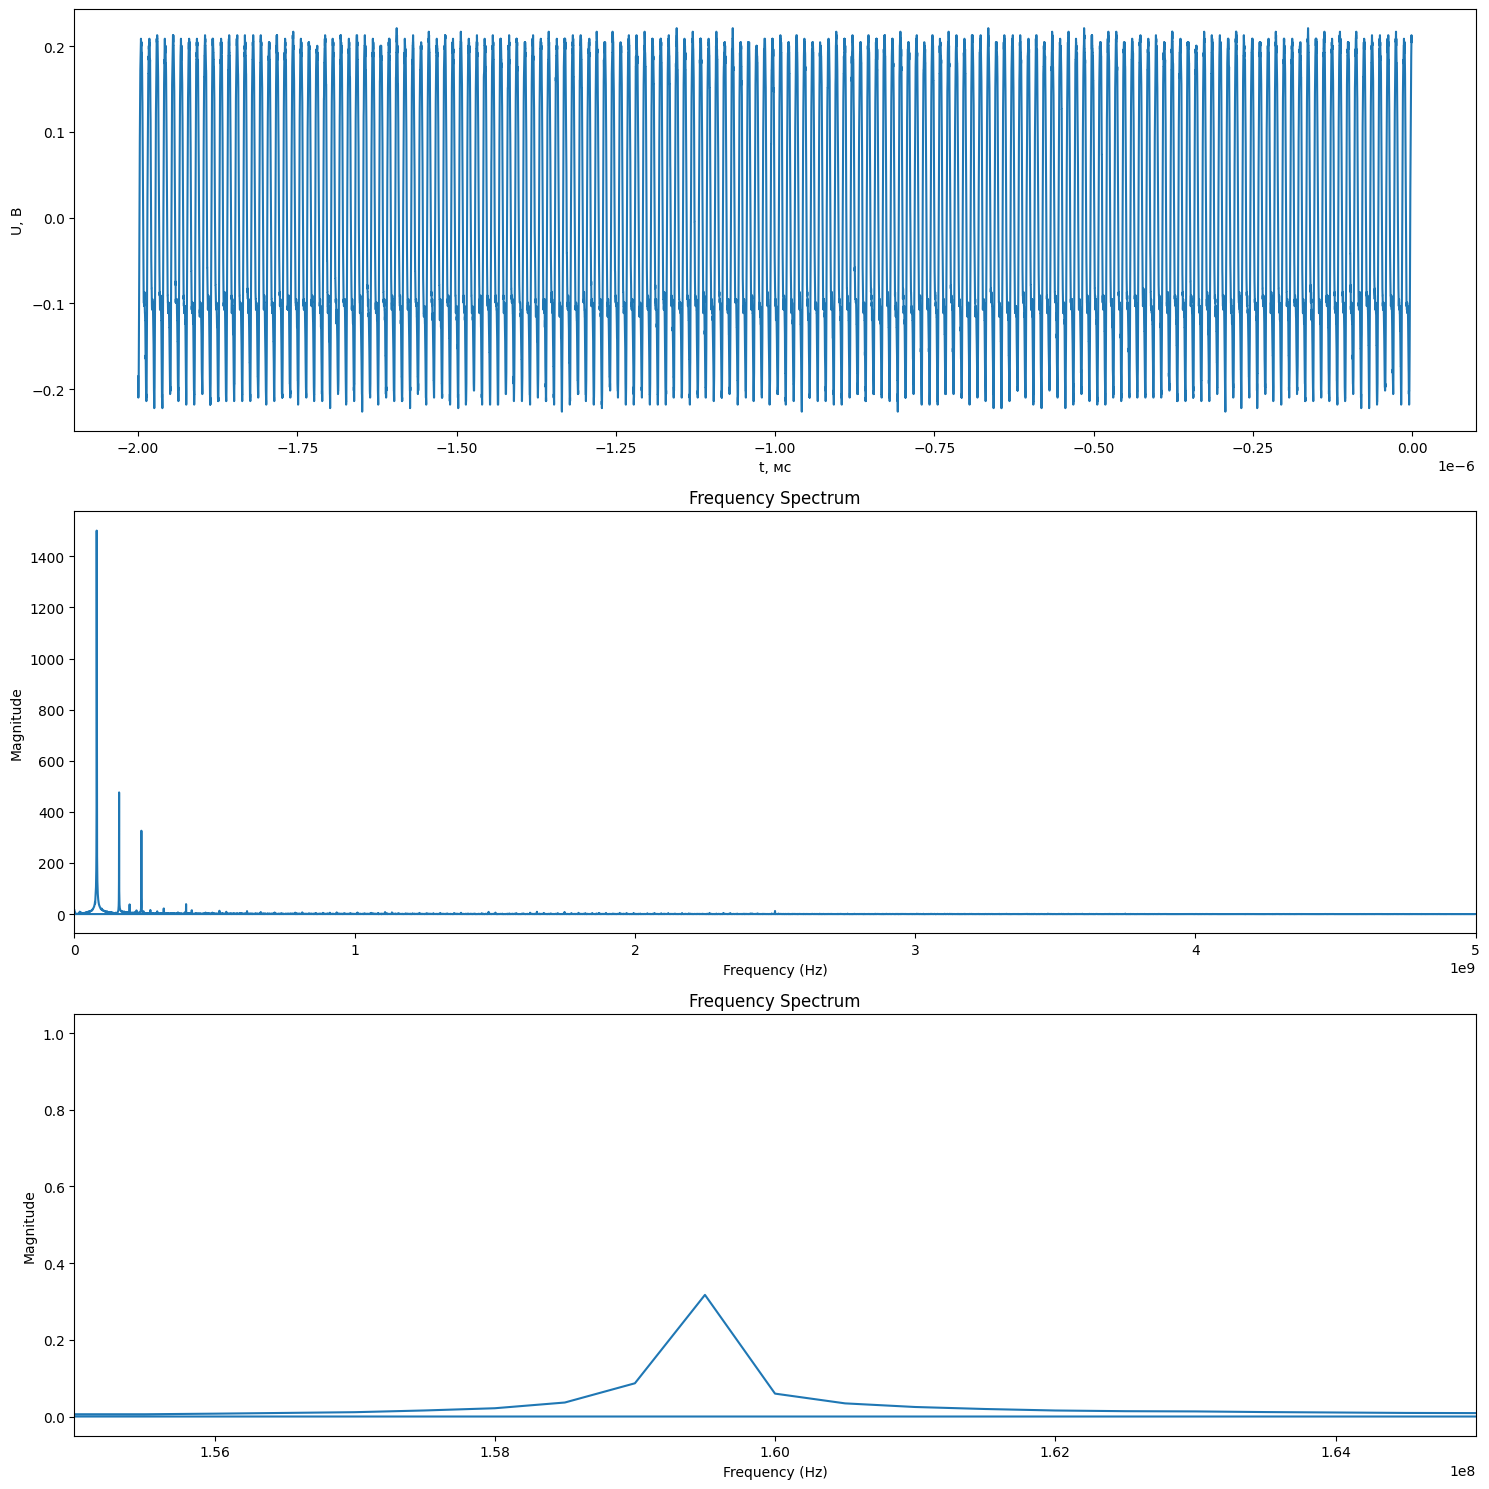

Максимум спектра находится в точке x = 79500000.0002
1.0 79500000.00016238
0.6390049711188234 80000000.0001634
0.6390049711188234 80000000.0001634
1.0 79500000.00016238


In [11]:
import math
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks
df = pd.read_csv('200ns0.csv')
#spectr1 = np.arange(-0.04999, 0.0500099, 1e-7)
spectr1 = np.array(df.iloc[:,0])
Spectr1 = np.array(df.iloc[:,1])
#spectr1 = np.linspace(-2.0250E-04, -1.9750E-04, 25000)

dt = spectr1[1] - spectr1[0]
fs = 1/dt
fft_signal = np.fft.fft(Spectr1)
freq = np.fft.fftfreq(len(Spectr1), d = dt)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))  # два графика вертикально
ax[0].plot(spectr1, Spectr1)
#plt.xticks(np.arange(min(spectr1_new) , max(spectr1_new),100))
ax[0].set_xlabel('t, мс')
ax[0].set_ylabel('U, В')

ax[1].plot(freq, np.abs(fft_signal))
ax[1].set_xlim(0, fs/2)  # отображение только положительных частот
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude')
ax[1].set_title('Frequency Spectrum')

v = 2.5*1e-3
Lambda = 1550e-9
fS =  2 * v /Lambda
#print(fS)
#for i in range(len(freq)):
    #if abs(freq[i] - fS) < 1000:
        #print(freq[i])
        #print(fft_signal[i])
#3225.8064516129034
ax[2].plot(freq, np.abs(fft_signal)/max(abs(fft_signal)))
ax[2].set_xlim(155e6, 165e6)  # отображение только положительных частот
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Magnitude')
ax[2].set_title('Frequency Spectrum')

fft_signal_norm = abs(fft_signal)/max(abs(fft_signal))

#print(299769)
#ax[3].plot(freq, np.abs(fft_signal))
#ax[3].axvline(x = 298268.44159920904, color='k', linestyle='-')
#ax[3].set_xlim(250e3, 350e3)  # отображение только положительных частот
#ax[3].set_xlabel('Frequency (Hz)')
#ax[3].set_ylabel('Magnitude')
#ax[3].set_title('Frequency Spectrum')

#Freq = []
#for i in range(len(freq)):
#    if freq[i]>=0:
#        Freq.append(freq[i])
#Spl1 = interp1d(Freq, abs(fft_signal_norm), kind='cubic')
#spectr1_new = np.linspace(Freq[0], Freq[-1])
#Spectr1_spl = Spl1(spectr1_new)

#ax[4].plot(spectr1_new, Spectr1_spl, 'r-')
#ax[4].set_xlabel('ν, MГц')
#ax[4].set_ylabel('P, dBm')
#ax[4].set_title('')

plt.tight_layout()
plt.show()

# Поиск пиков
peaks, _ = find_peaks(abs(fft_signal))

# Определение максимального пика
max_peak_index = peaks[np.argmax(abs(fft_signal[peaks]))]

# Значение по оси x для максимального пика
max_x_value = freq[max_peak_index]
print(f'Максимум спектра находится в точке x = {max_x_value:.4f}')
for i in range(len(freq)):
    if abs(fft_signal_norm[i]) - 0.5>0:
        print(abs(fft_signal_norm[i]), abs(freq[i]))


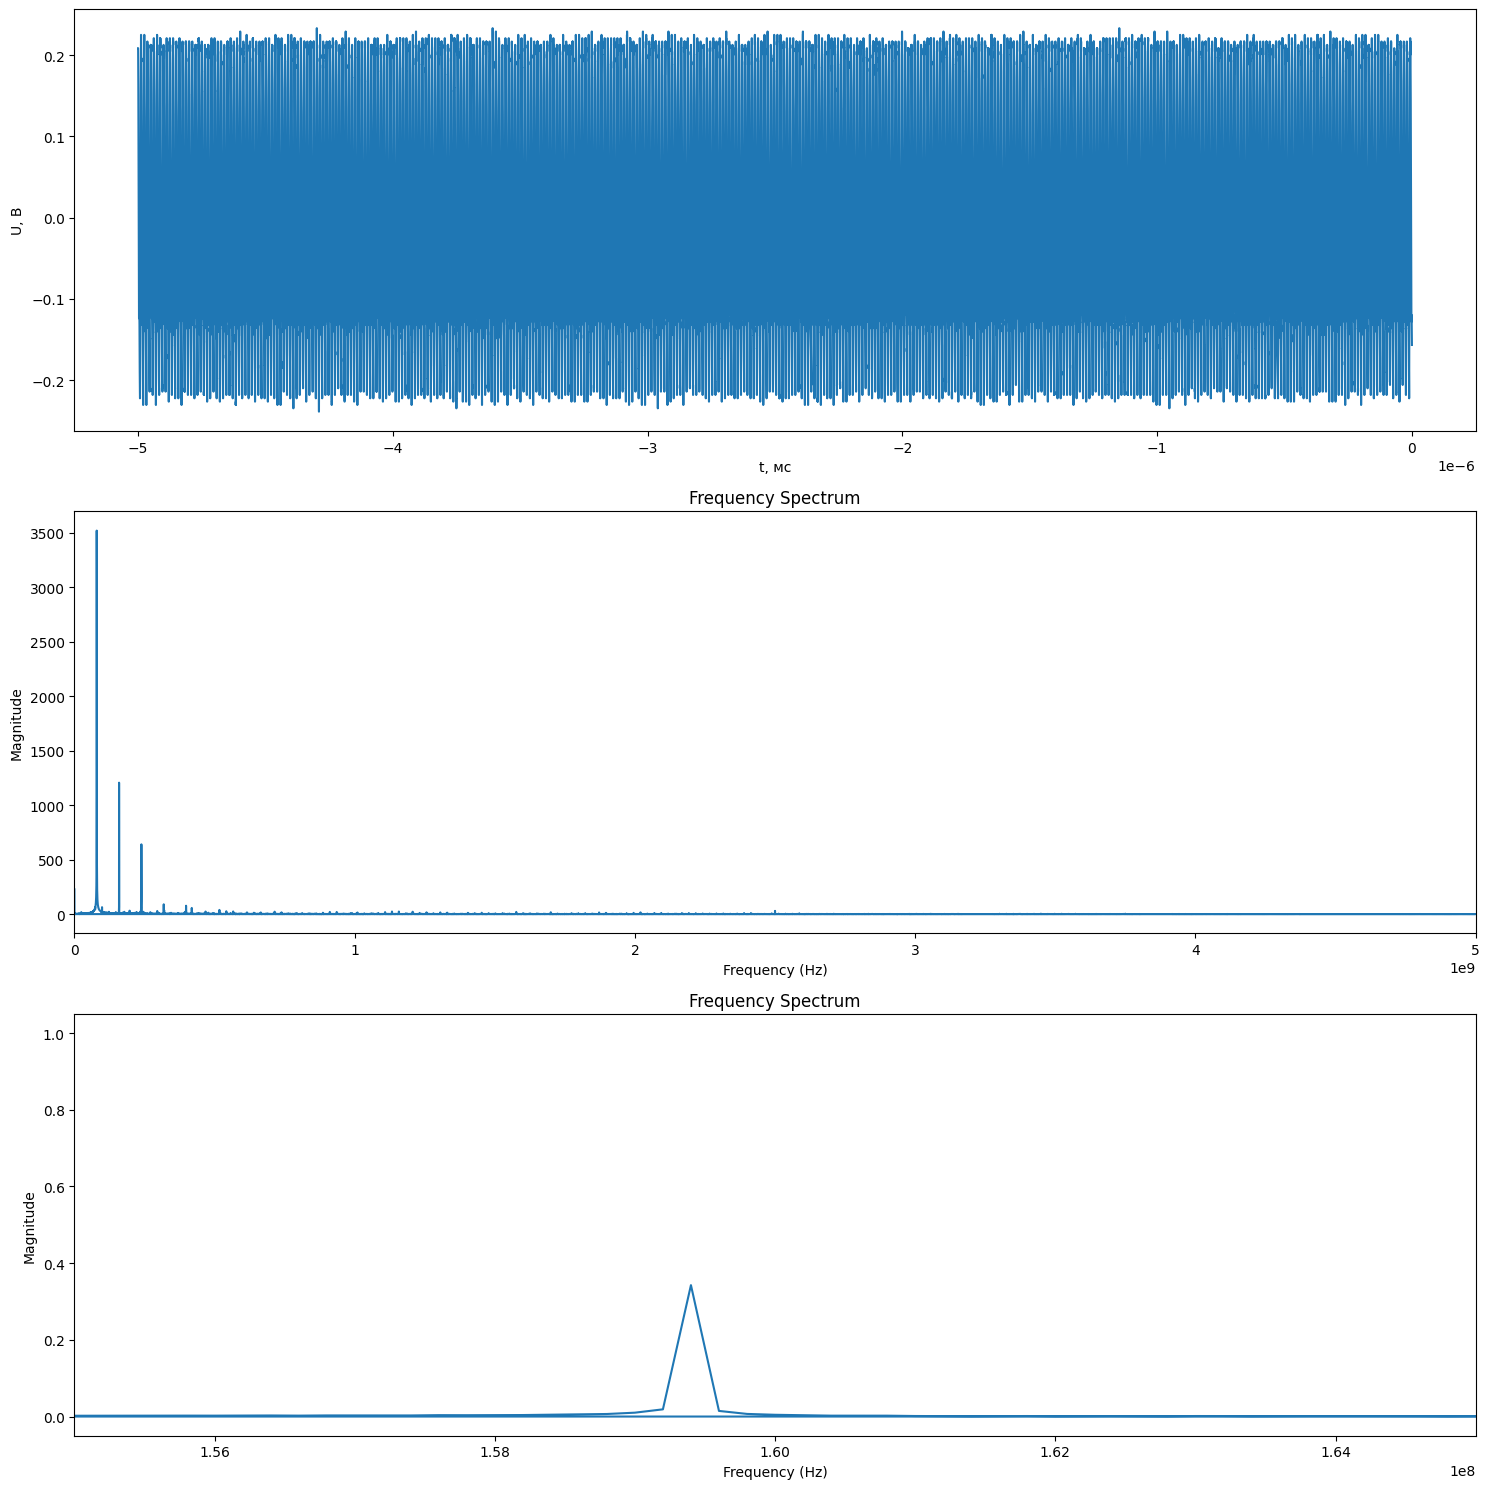

Максимум спектра находится в точке x = 79599999.9998
1.0 79599999.99982546
0.9094282536453515 79799999.99982503
0.9094282536453515 79799999.99982503
0.9999999999999999 79599999.99982546


In [10]:
import math
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks
df = pd.read_csv('500ns0.csv')
#spectr1 = np.arange(-0.04999, 0.0500099, 1e-7)
spectr1 = np.array(df.iloc[:,0])
Spectr1 = np.array(df.iloc[:,1])
#spectr1 = np.linspace(-2.0250E-04, -1.9750E-04, 25000)

dt = spectr1[1] - spectr1[0]
fs = 1/dt
fft_signal = np.fft.fft(Spectr1)
freq = np.fft.fftfreq(len(Spectr1), d = dt)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))  # два графика вертикально
ax[0].plot(spectr1, Spectr1)
#plt.xticks(np.arange(min(spectr1_new) , max(spectr1_new),100))
ax[0].set_xlabel('t, мс')
ax[0].set_ylabel('U, В')

ax[1].plot(freq, np.abs(fft_signal))
ax[1].set_xlim(0, fs/2)  # отображение только положительных частот
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude')
ax[1].set_title('Frequency Spectrum')

v = 2.5*1e-3
Lambda = 1550e-9
fS =  2 * v /Lambda
#print(fS)
#for i in range(len(freq)):
    #if abs(freq[i] - fS) < 1000:
        #print(freq[i])
        #print(fft_signal[i])
#3225.8064516129034
ax[2].plot(freq, np.abs(fft_signal)/max(abs(fft_signal)))
ax[2].set_xlim(155e6, 165e6)  # отображение только положительных частот
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Magnitude')
ax[2].set_title('Frequency Spectrum')

fft_signal_norm = abs(fft_signal)/max(abs(fft_signal))

#print(299769)
#ax[3].plot(freq, np.abs(fft_signal))
#ax[3].axvline(x = 298268.44159920904, color='k', linestyle='-')
#ax[3].set_xlim(250e3, 350e3)  # отображение только положительных частот
#ax[3].set_xlabel('Frequency (Hz)')
#ax[3].set_ylabel('Magnitude')
#ax[3].set_title('Frequency Spectrum')

#Freq = []
#for i in range(len(freq)):
#    if freq[i]>=0:
#        Freq.append(freq[i])
#Spl1 = interp1d(Freq, abs(fft_signal_norm), kind='cubic')
#spectr1_new = np.linspace(Freq[0], Freq[-1])
#Spectr1_spl = Spl1(spectr1_new)

#ax[4].plot(spectr1_new, Spectr1_spl, 'r-')
#ax[4].set_xlabel('ν, MГц')
#ax[4].set_ylabel('P, dBm')
#ax[4].set_title('')

plt.tight_layout()
plt.show()

# Поиск пиков
peaks, _ = find_peaks(abs(fft_signal))

# Определение максимального пика
max_peak_index = peaks[np.argmax(abs(fft_signal[peaks]))]

# Значение по оси x для максимального пика
max_x_value = freq[max_peak_index]
print(f'Максимум спектра находится в точке x = {max_x_value:.4f}')
for i in range(len(freq)):
    if abs(fft_signal_norm[i]) - 0.5>0:
        print(abs(fft_signal_norm[i]), abs(freq[i]))


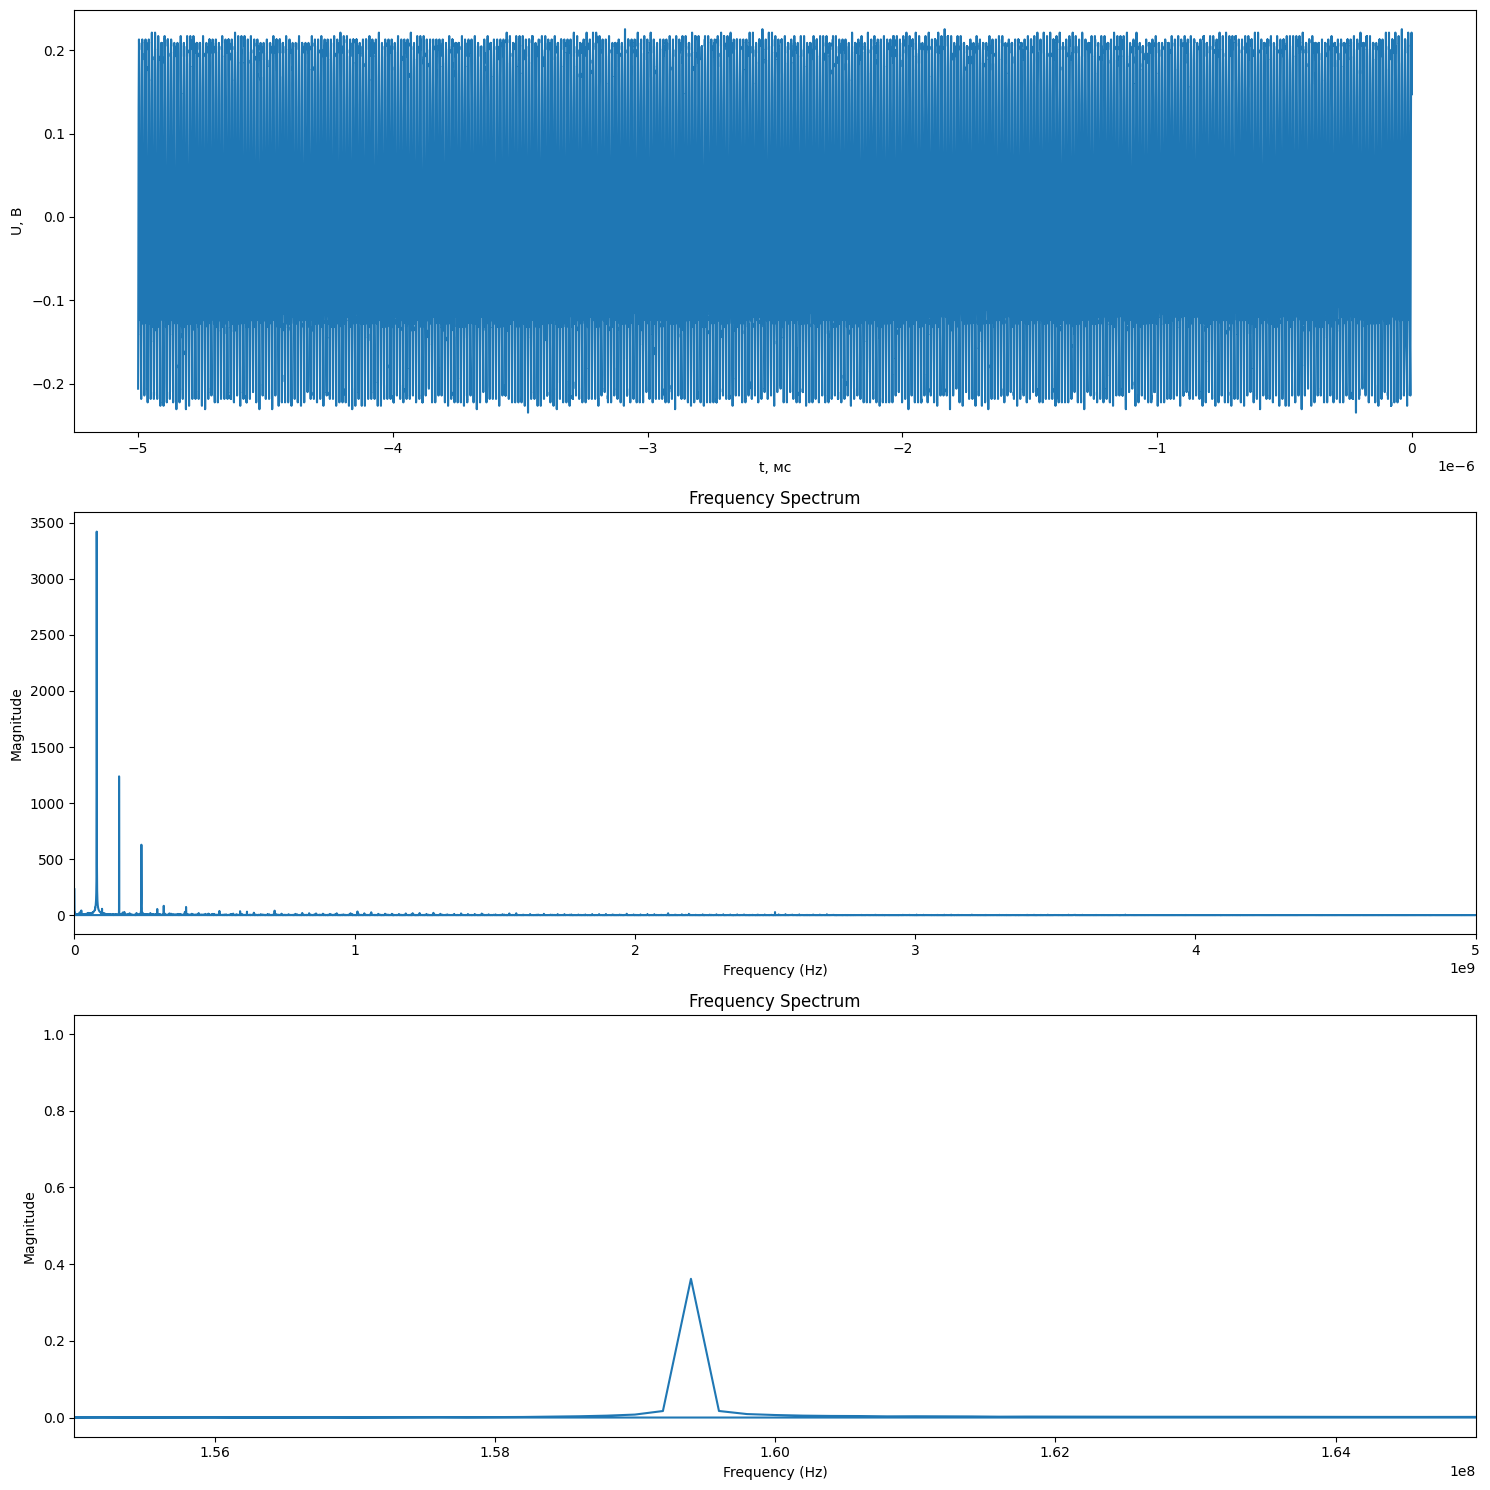

Максимум спектра находится в точке x = 79599999.9998
1.0 79599999.99982546
0.904497615567794 79799999.99982503
0.904497615567794 79799999.99982503
1.0 79599999.99982546


In [9]:
import math
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks
df = pd.read_csv('500ns1.csv')
#spectr1 = np.arange(-0.04999, 0.0500099, 1e-7)
spectr1 = np.array(df.iloc[:,0])
Spectr1 = np.array(df.iloc[:,1])
#spectr1 = np.linspace(-2.0250E-04, -1.9750E-04, 25000)

dt = spectr1[1] - spectr1[0]
fs = 1/dt
fft_signal = np.fft.fft(Spectr1)
freq = np.fft.fftfreq(len(Spectr1), d = dt)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))  # два графика вертикально
ax[0].plot(spectr1, Spectr1)
#plt.xticks(np.arange(min(spectr1_new) , max(spectr1_new),100))
ax[0].set_xlabel('t, мс')
ax[0].set_ylabel('U, В')

ax[1].plot(freq, np.abs(fft_signal))
ax[1].set_xlim(0, fs/2)  # отображение только положительных частот
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude')
ax[1].set_title('Frequency Spectrum')

v = 2.5*1e-3
Lambda = 1550e-9
fS =  2 * v /Lambda
#print(fS)
#for i in range(len(freq)):
    #if abs(freq[i] - fS) < 1000:
        #print(freq[i])
        #print(fft_signal[i])
#3225.8064516129034
ax[2].plot(freq, np.abs(fft_signal)/max(abs(fft_signal)))
ax[2].set_xlim(155e6, 165e6)  # отображение только положительных частот
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Magnitude')
ax[2].set_title('Frequency Spectrum')

fft_signal_norm = abs(fft_signal)/max(abs(fft_signal))

#print(299769)
#ax[3].plot(freq, np.abs(fft_signal))
#ax[3].axvline(x = 298268.44159920904, color='k', linestyle='-')
#ax[3].set_xlim(250e3, 350e3)  # отображение только положительных частот
#ax[3].set_xlabel('Frequency (Hz)')
#ax[3].set_ylabel('Magnitude')
#ax[3].set_title('Frequency Spectrum')

#Freq = []
#for i in range(len(freq)):
#    if freq[i]>=0:
#        Freq.append(freq[i])
#Spl1 = interp1d(Freq, abs(fft_signal_norm), kind='cubic')
#spectr1_new = np.linspace(Freq[0], Freq[-1])
#Spectr1_spl = Spl1(spectr1_new)

#ax[4].plot(spectr1_new, Spectr1_spl, 'r-')
#ax[4].set_xlabel('ν, MГц')
#ax[4].set_ylabel('P, dBm')
#ax[4].set_title('')

plt.tight_layout()
plt.show()

# Поиск пиков
peaks, _ = find_peaks(abs(fft_signal))

# Определение максимального пика
max_peak_index = peaks[np.argmax(abs(fft_signal[peaks]))]

# Значение по оси x для максимального пика
max_x_value = freq[max_peak_index]
print(f'Максимум спектра находится в точке x = {max_x_value:.4f}')
for i in range(len(freq)):
    if abs(fft_signal_norm[i]) - 0.5>0:
        print(abs(fft_signal_norm[i]), abs(freq[i]))


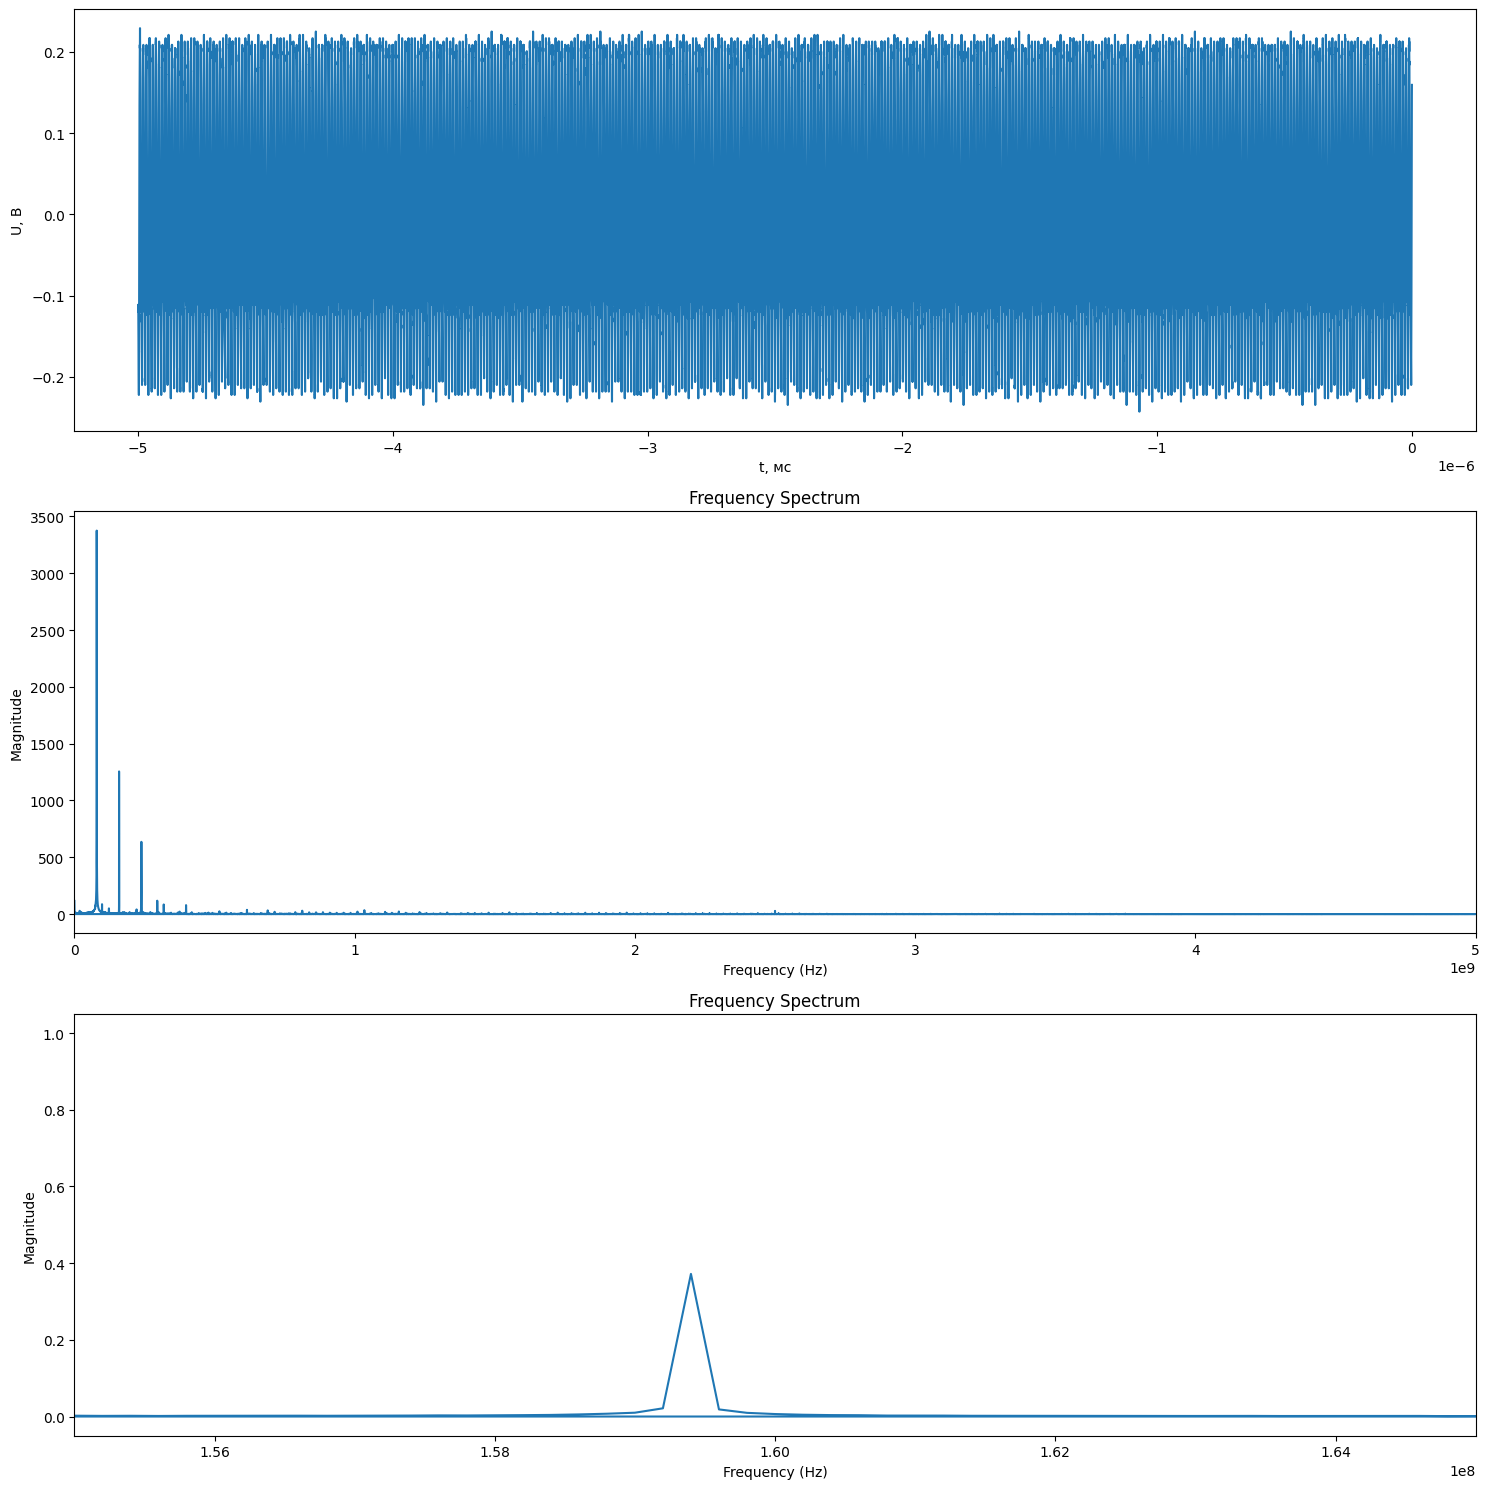

Максимум спектра находится в точке x = 79599999.9998
1.0 79599999.99982546
0.8993679079475683 79799999.99982503
0.8993679079475683 79799999.99982503
1.0 79599999.99982546


In [8]:
import math
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks
df = pd.read_csv('500ns2.csv')
#spectr1 = np.arange(-0.04999, 0.0500099, 1e-7)
spectr1 = np.array(df.iloc[:,0])
Spectr1 = np.array(df.iloc[:,1])
#spectr1 = np.linspace(-2.0250E-04, -1.9750E-04, 25000)

dt = spectr1[1] - spectr1[0]
fs = 1/dt
fft_signal = np.fft.fft(Spectr1)
freq = np.fft.fftfreq(len(Spectr1), d = dt)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))  # два графика вертикально
ax[0].plot(spectr1, Spectr1)
#plt.xticks(np.arange(min(spectr1_new) , max(spectr1_new),100))
ax[0].set_xlabel('t, мс')
ax[0].set_ylabel('U, В')

ax[1].plot(freq, np.abs(fft_signal))
ax[1].set_xlim(0, fs/2)  # отображение только положительных частот
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude')
ax[1].set_title('Frequency Spectrum')

v = 2.5*1e-3
Lambda = 1550e-9
fS =  2 * v /Lambda
#print(fS)
#for i in range(len(freq)):
    #if abs(freq[i] - fS) < 1000:
        #print(freq[i])
        #print(fft_signal[i])
#3225.8064516129034
ax[2].plot(freq, np.abs(fft_signal)/max(abs(fft_signal)))
ax[2].set_xlim(155e6, 165e6)  # отображение только положительных частот
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Magnitude')
ax[2].set_title('Frequency Spectrum')

fft_signal_norm = abs(fft_signal)/max(abs(fft_signal))

#print(299769)
#ax[3].plot(freq, np.abs(fft_signal))
#ax[3].axvline(x = 298268.44159920904, color='k', linestyle='-')
#ax[3].set_xlim(250e3, 350e3)  # отображение только положительных частот
#ax[3].set_xlabel('Frequency (Hz)')
#ax[3].set_ylabel('Magnitude')
#ax[3].set_title('Frequency Spectrum')

#Freq = []
#for i in range(len(freq)):
#    if freq[i]>=0:
#        Freq.append(freq[i])
#Spl1 = interp1d(Freq, abs(fft_signal_norm), kind='cubic')
#spectr1_new = np.linspace(Freq[0], Freq[-1])
#Spectr1_spl = Spl1(spectr1_new)

#ax[4].plot(spectr1_new, Spectr1_spl, 'r-')
#ax[4].set_xlabel('ν, MГц')
#ax[4].set_ylabel('P, dBm')
#ax[4].set_title('')

plt.tight_layout()
plt.show()

# Поиск пиков
peaks, _ = find_peaks(abs(fft_signal))

# Определение максимального пика
max_peak_index = peaks[np.argmax(abs(fft_signal[peaks]))]

# Значение по оси x для максимального пика
max_x_value = freq[max_peak_index]
print(f'Максимум спектра находится в точке x = {max_x_value:.4f}')
for i in range(len(freq)):
    if abs(fft_signal_norm[i]) - 0.5>0:
        print(abs(fft_signal_norm[i]), abs(freq[i]))


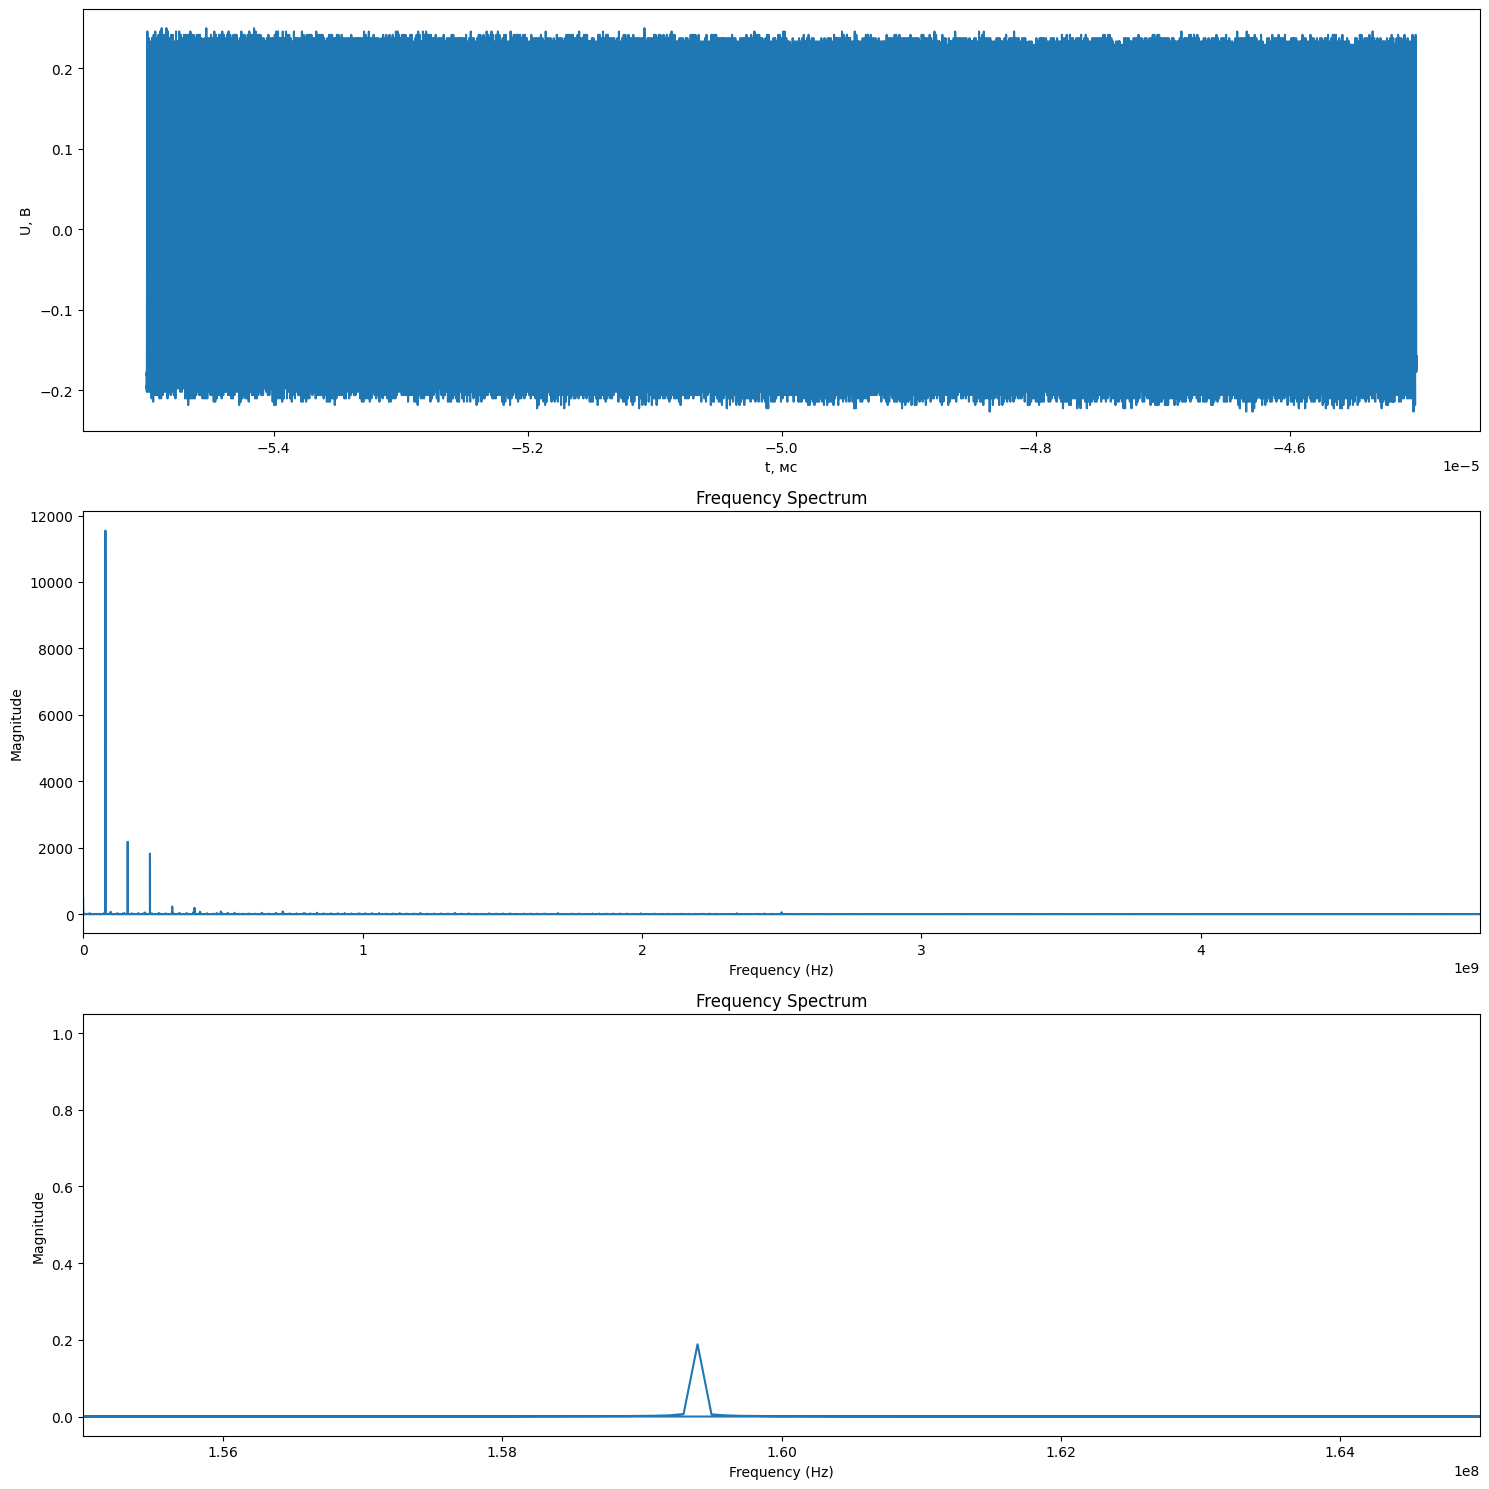

Максимум спектра находится в точке x = 79699203.0021
1.0 79699203.00213854
1.0 79699203.00213854


In [7]:
import math
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks
df = pd.read_csv('1mks0.csv')
#spectr1 = np.arange(-0.04999, 0.0500099, 1e-7)
spectr1 = np.array(df.iloc[:,0])
Spectr1 = np.array(df.iloc[:,1])
spectr1 = np.linspace(-5.5000E-05, -4.5000E-05, 100000)

dt = spectr1[1] - spectr1[0]
fs = 1/dt
fft_signal = np.fft.fft(Spectr1)
freq = np.fft.fftfreq(len(Spectr1), d = dt)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))  # два графика вертикально
ax[0].plot(spectr1, Spectr1)
#plt.xticks(np.arange(min(spectr1_new) , max(spectr1_new),100))
ax[0].set_xlabel('t, мс')
ax[0].set_ylabel('U, В')

ax[1].plot(freq, np.abs(fft_signal))
ax[1].set_xlim(0, fs/2)  # отображение только положительных частот
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude')
ax[1].set_title('Frequency Spectrum')

v = 2.5*1e-3
Lambda = 1550e-9
fS =  2 * v /Lambda
#print(fS)
#for i in range(len(freq)):
    #if abs(freq[i] - fS) < 1000:
        #print(freq[i])
        #print(fft_signal[i])
#3225.8064516129034
ax[2].plot(freq, np.abs(fft_signal)/max(abs(fft_signal)))
ax[2].set_xlim(155e6, 165e6)  # отображение только положительных частот
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Magnitude')
ax[2].set_title('Frequency Spectrum')

fft_signal_norm = abs(fft_signal)/max(abs(fft_signal))

#print(299769)
#ax[3].plot(freq, np.abs(fft_signal))
#ax[3].axvline(x = 298268.44159920904, color='k', linestyle='-')
#ax[3].set_xlim(250e3, 350e3)  # отображение только положительных частот
#ax[3].set_xlabel('Frequency (Hz)')
#ax[3].set_ylabel('Magnitude')
#ax[3].set_title('Frequency Spectrum')

#Freq = []
#for i in range(len(freq)):
#    if freq[i]>=0:
#        Freq.append(freq[i])
#Spl1 = interp1d(Freq, abs(fft_signal_norm), kind='cubic')
#spectr1_new = np.linspace(Freq[0], Freq[-1])
#Spectr1_spl = Spl1(spectr1_new)

#ax[4].plot(spectr1_new, Spectr1_spl, 'r-')
#ax[4].set_xlabel('ν, MГц')
#ax[4].set_ylabel('P, dBm')
#ax[4].set_title('')

plt.tight_layout()
plt.show()

# Поиск пиков
peaks, _ = find_peaks(abs(fft_signal))

# Определение максимального пика
max_peak_index = peaks[np.argmax(abs(fft_signal[peaks]))]

# Значение по оси x для максимального пика
max_x_value = freq[max_peak_index]
print(f'Максимум спектра находится в точке x = {max_x_value:.4f}')
for i in range(len(freq)):
    if abs(fft_signal_norm[i]) - 0.5>0:
        print(abs(fft_signal_norm[i]), abs(freq[i]))


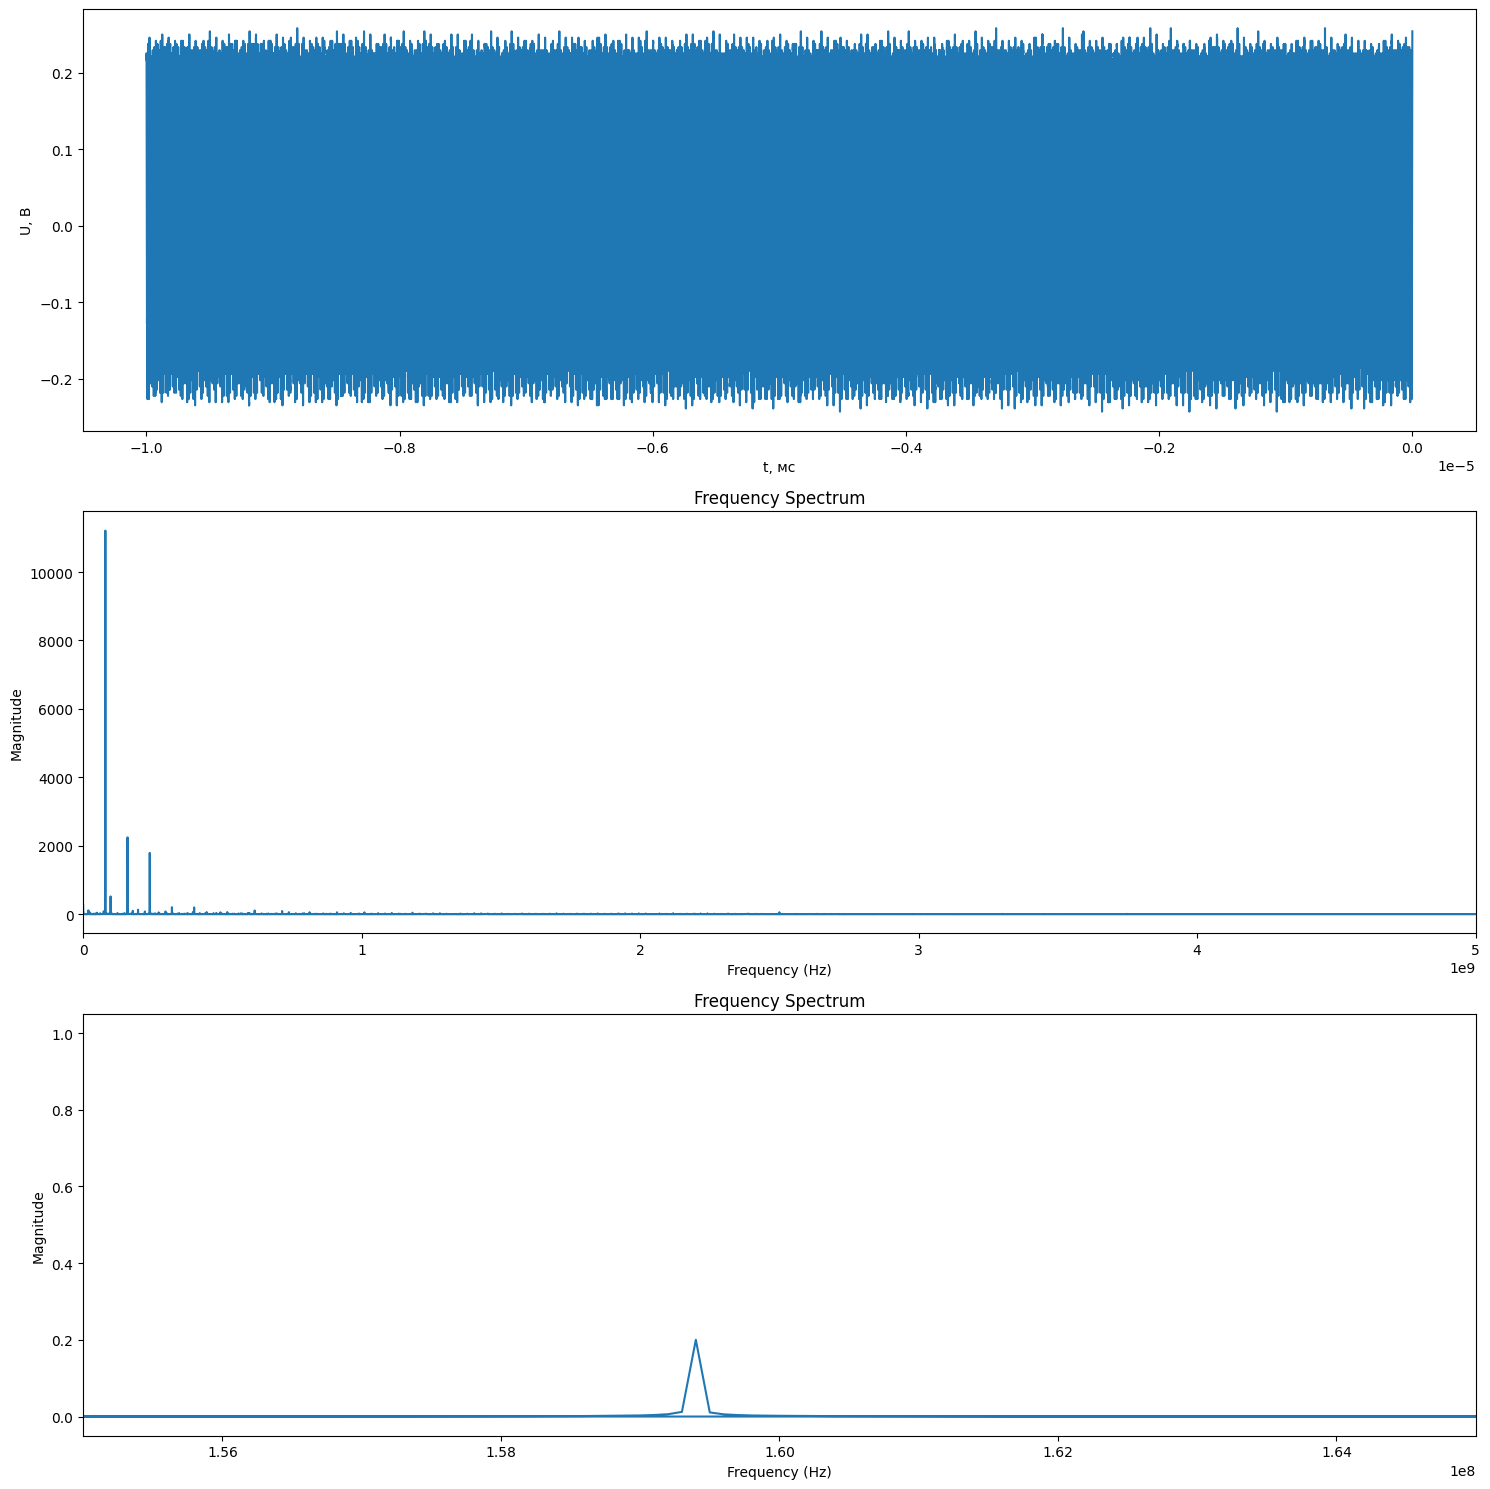

Максимум спектра находится в точке x = 79699999.9998
1.0 79699999.99982524
1.0 79699999.99982524


In [4]:
import math
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks
df = pd.read_csv('1mks1.csv')
#spectr1 = np.arange(-0.04999, 0.0500099, 1e-7)
spectr1 = np.array(df.iloc[:,0])
Spectr1 = np.array(df.iloc[:,1])
#spectr1 = np.linspace(-2.0250E-04, -1.9750E-04, 25000)

dt = spectr1[1] - spectr1[0]
fs = 1/dt
fft_signal = np.fft.fft(Spectr1)
freq = np.fft.fftfreq(len(Spectr1), d = dt)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))  # два графика вертикально
ax[0].plot(spectr1, Spectr1)
#plt.xticks(np.arange(min(spectr1_new) , max(spectr1_new),100))
ax[0].set_xlabel('t, мс')
ax[0].set_ylabel('U, В')

ax[1].plot(freq, np.abs(fft_signal))
ax[1].set_xlim(0, fs/2)  # отображение только положительных частот
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude')
ax[1].set_title('Frequency Spectrum')

v = 2.5*1e-3
Lambda = 1550e-9
fS =  2 * v /Lambda
#print(fS)
#for i in range(len(freq)):
    #if abs(freq[i] - fS) < 1000:
        #print(freq[i])
        #print(fft_signal[i])
#3225.8064516129034
ax[2].plot(freq, np.abs(fft_signal)/max(abs(fft_signal)))
ax[2].set_xlim(155e6, 165e6)  # отображение только положительных частот
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Magnitude')
ax[2].set_title('Frequency Spectrum')

fft_signal_norm = abs(fft_signal)/max(abs(fft_signal))

#print(299769)
#ax[3].plot(freq, np.abs(fft_signal))
#ax[3].axvline(x = 298268.44159920904, color='k', linestyle='-')
#ax[3].set_xlim(250e3, 350e3)  # отображение только положительных частот
#ax[3].set_xlabel('Frequency (Hz)')
#ax[3].set_ylabel('Magnitude')
#ax[3].set_title('Frequency Spectrum')

#Freq = []
#for i in range(len(freq)):
#    if freq[i]>=0:
#        Freq.append(freq[i])
#Spl1 = interp1d(Freq, abs(fft_signal_norm), kind='cubic')
#spectr1_new = np.linspace(Freq[0], Freq[-1])
#Spectr1_spl = Spl1(spectr1_new)

#ax[4].plot(spectr1_new, Spectr1_spl, 'r-')
#ax[4].set_xlabel('ν, MГц')
#ax[4].set_ylabel('P, dBm')
#ax[4].set_title('')

plt.tight_layout()
plt.show()

# Поиск пиков
peaks, _ = find_peaks(abs(fft_signal))

# Определение максимального пика
max_peak_index = peaks[np.argmax(abs(fft_signal[peaks]))]

# Значение по оси x для максимального пика
max_x_value = freq[max_peak_index]
print(f'Максимум спектра находится в точке x = {max_x_value:.4f}')
for i in range(len(freq)):
    if abs(fft_signal_norm[i]) - 0.5>0:
        print(abs(fft_signal_norm[i]), abs(freq[i]))


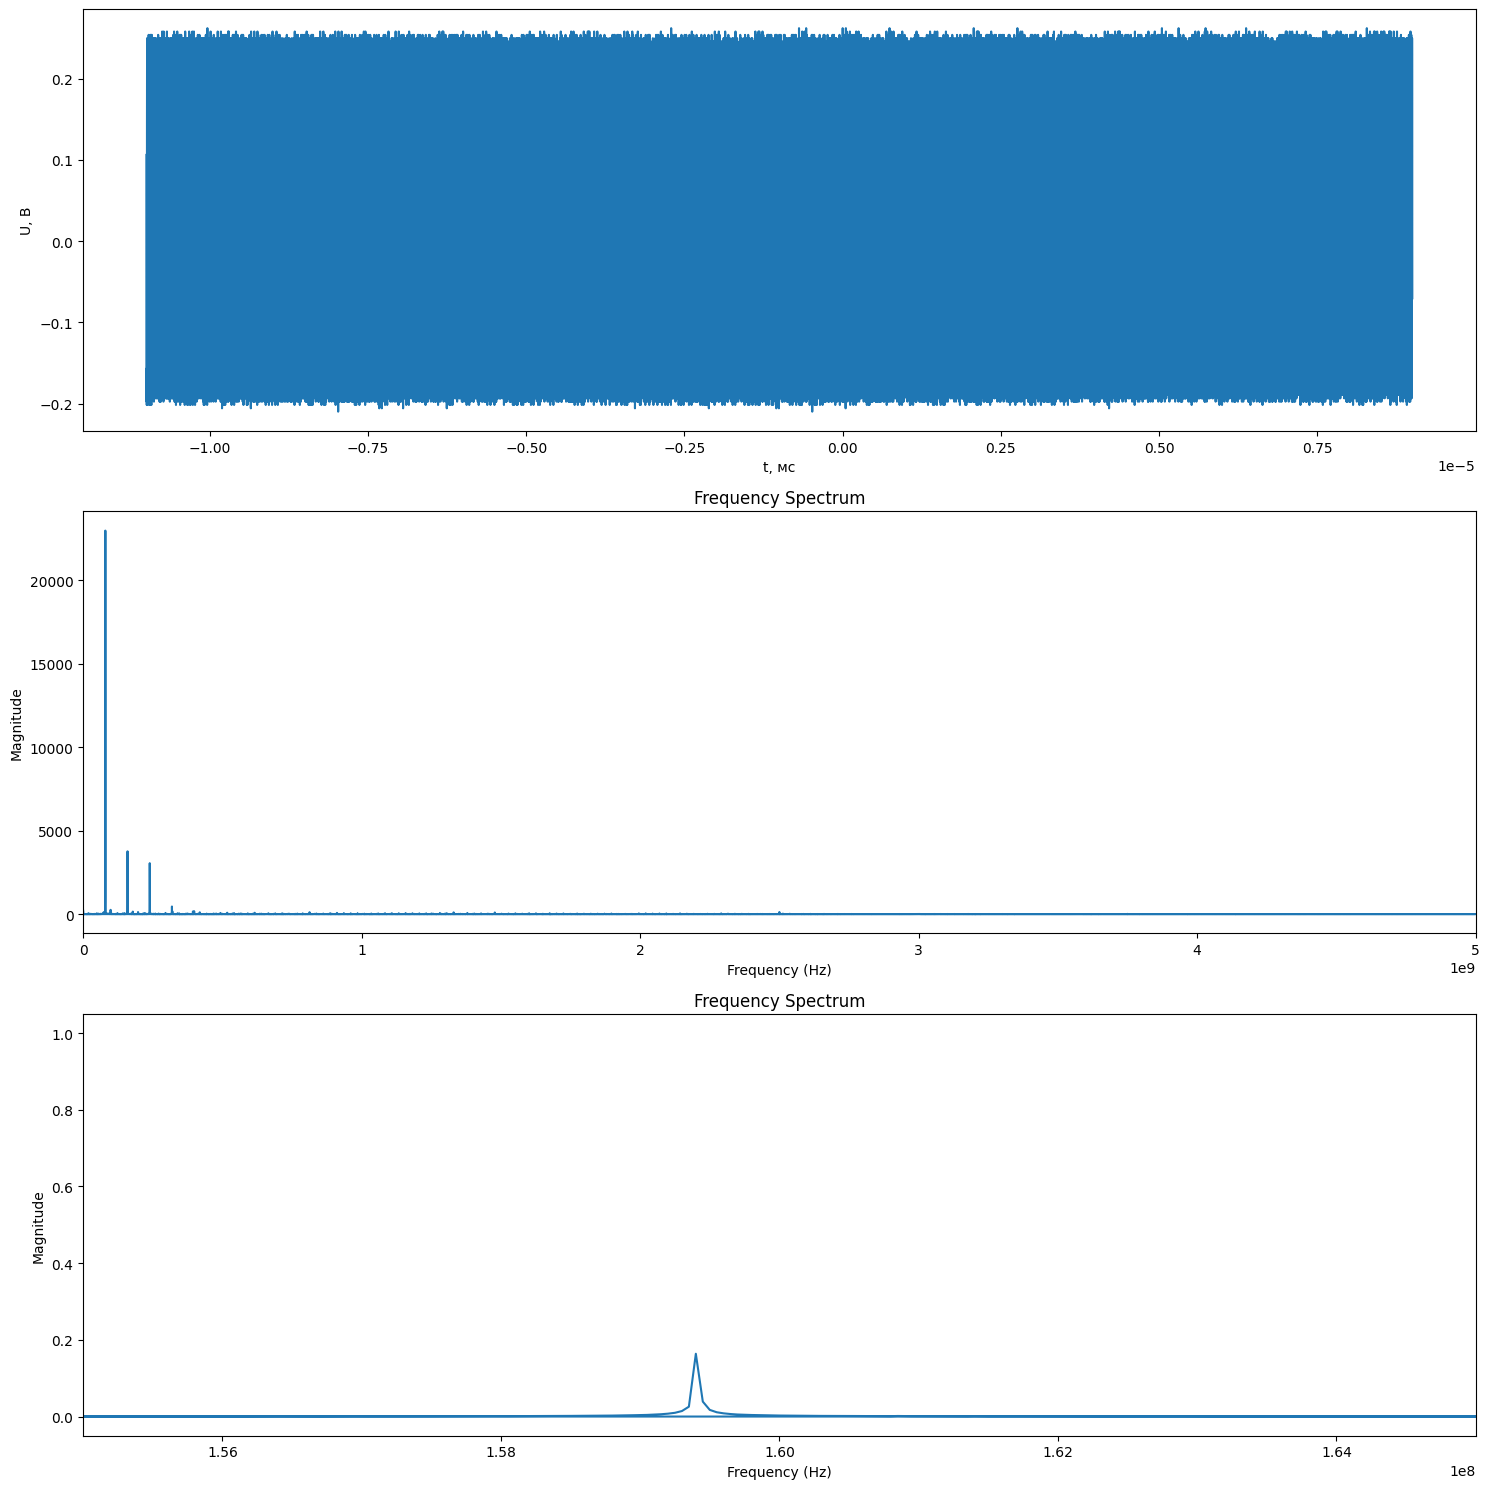

Максимум спектра находится в точке x = 79699999.9998
1.0 79699999.99982524
1.0 79699999.99982524


In [48]:
import math
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks
df = pd.read_csv('2mks0.csv')
#spectr1 = np.arange(-0.04999, 0.0500099, 1e-7)
spectr1 = np.array(df.iloc[:,0])
Spectr1 = np.array(df.iloc[:,1])
spectr1 = np.linspace(-1.1000E-05, 8.9999E-06, 200000)

dt = spectr1[1] - spectr1[0]
fs = 1/dt
fft_signal = np.fft.fft(Spectr1)
freq = np.fft.fftfreq(len(Spectr1), d = dt)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))  # два графика вертикально
ax[0].plot(spectr1, Spectr1)
#plt.xticks(np.arange(min(spectr1_new) , max(spectr1_new),100))
ax[0].set_xlabel('t, мс')
ax[0].set_ylabel('U, В')

ax[1].plot(freq, np.abs(fft_signal))
ax[1].set_xlim(0, fs/2)  # отображение только положительных частот
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude')
ax[1].set_title('Frequency Spectrum')

v = 2.5*1e-3
Lambda = 1550e-9
fS =  2 * v /Lambda
#print(fS)
#for i in range(len(freq)):
    #if abs(freq[i] - fS) < 1000:
        #print(freq[i])
        #print(fft_signal[i])
#3225.8064516129034
ax[2].plot(freq, np.abs(fft_signal)/max(abs(fft_signal)))
ax[2].set_xlim(155e6, 165e6)  # отображение только положительных частот
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Magnitude')
ax[2].set_title('Frequency Spectrum')

fft_signal_norm = abs(fft_signal)/max(abs(fft_signal))

#print(299769)
#ax[3].plot(freq, np.abs(fft_signal))
#ax[3].axvline(x = 298268.44159920904, color='k', linestyle='-')
#ax[3].set_xlim(250e3, 350e3)  # отображение только положительных частот
#ax[3].set_xlabel('Frequency (Hz)')
#ax[3].set_ylabel('Magnitude')
#ax[3].set_title('Frequency Spectrum')

#Freq = []
#for i in range(len(freq)):
#    if freq[i]>=0:
#        Freq.append(freq[i])
#Spl1 = interp1d(Freq, abs(fft_signal_norm), kind='cubic')
#spectr1_new = np.linspace(Freq[0], Freq[-1])
#Spectr1_spl = Spl1(spectr1_new)

#ax[4].plot(spectr1_new, Spectr1_spl, 'r-')
#ax[4].set_xlabel('ν, MГц')
#ax[4].set_ylabel('P, dBm')
#ax[4].set_title('')

plt.tight_layout()
plt.show()

# Поиск пиков
peaks, _ = find_peaks(abs(fft_signal))

# Определение максимального пика
max_peak_index = peaks[np.argmax(abs(fft_signal[peaks]))]

# Значение по оси x для максимального пика
max_x_value = freq[max_peak_index]
print(f'Максимум спектра находится в точке x = {max_x_value:.4f}')
for i in range(len(freq)):
    if abs(fft_signal_norm[i]) - 0.5>0:
        print(abs(fft_signal_norm[i]), abs(freq[i]))


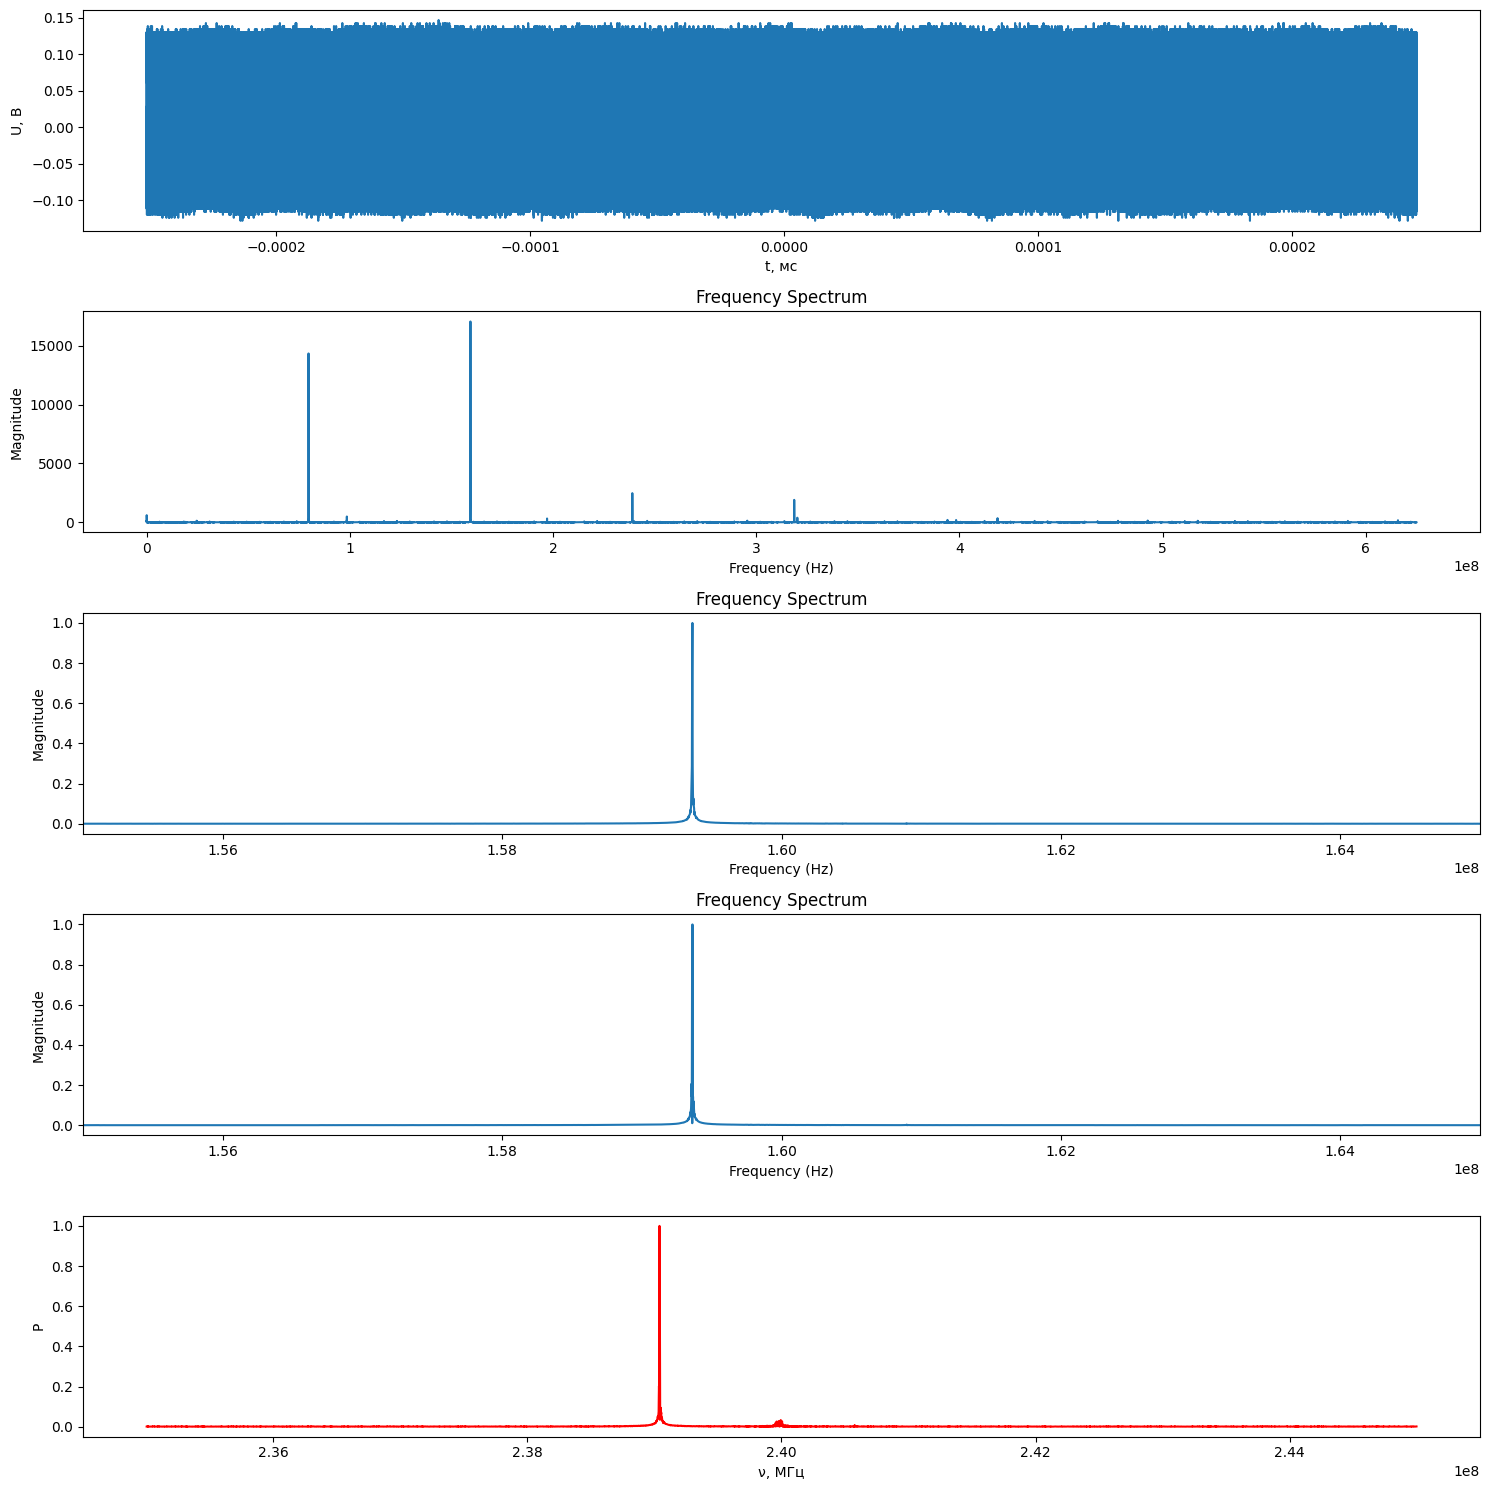

FWHM в кГц 4.899061152130366
FWHM в кГц 4.59911863258481


In [4]:
import math
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks
df = pd.read_csv('50mks0.csv')
#spectr1 = np.arange(-0.04999, 0.0500099, 1e-7)
spectr1 = np.array(df.iloc[:,0])
Spectr1 = np.array(df.iloc[:,1])
spectr1 = np.linspace(-2.5100E-04, 2.4900E-04, 625000)

dt = spectr1[1] - spectr1[0]
fs = 1/dt
fft_signal = np.fft.fft(Spectr1)
freq = np.fft.fftfreq(len(Spectr1), d = dt)
fft_signal = fft_signal[:len(fft_signal)//2-1]
freq = freq[freq>0]
Freq = []
Fft_signal = []
for i in range(len(freq)):
    if (freq[i]>155e6) and (freq[i]<165e6):
        Freq.append(freq[i])
        Fft_signal.append(fft_signal[i])

Spl1 = interp1d(np.array(Freq), np.array(Fft_signal), kind='cubic')
spectr1_new = np.linspace(Freq[0], Freq[-1],100000)
Spectr1_spl = Spl1(spectr1_new)


fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 15))  # два графика вертикально
ax[0].plot(spectr1, Spectr1)
#plt.xticks(np.arange(min(spectr1_new) , max(spectr1_new),100))
ax[0].set_xlabel('t, мс')
ax[0].set_ylabel('U, В')

ax[1].plot(freq, np.abs(fft_signal))
#ax[1].set_xlim(0, fs/2)  # отображение только положительных частот
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude')
ax[1].set_title('Frequency Spectrum')

v = 2.5*1e-3
Lambda = 1550e-9
fS =  2 * v /Lambda
#print(fS)
#for i in range(len(freq)):
    #if abs(freq[i] - fS) < 1000:
        #print(freq[i])
        #print(fft_signal[i])
#3225.8064516129034
ax[2].plot(freq, np.abs(fft_signal)/max(abs(fft_signal)))
ax[2].set_xlim(155e6, 165e6)  # отображение только положительных частот
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Magnitude')
ax[2].set_title('Frequency Spectrum')

fft_signal_norm = abs(fft_signal)/max(abs(fft_signal))
Spectr1_spl_norm = np.abs(Spectr1_spl)/max(np.abs(Spectr1_spl))
#print(299769)
ax[3].plot(spectr1_new, Spectr1_spl_norm)
#ax[3].axvline(x = 298268.44159920904, color='k', linestyle='-')
ax[3].set_xlim(155e6, 165e6)  # отображение только положительных частот
ax[3].set_xlabel('Frequency (Hz)')
ax[3].set_ylabel('Magnitude')
ax[3].set_title('Frequency Spectrum')

FReq = []
FFt_signal = []
for i in range(len(freq)):
    if (freq[i]>235e6) and (freq[i]<245e6):
        FReq.append(freq[i])
        FFt_signal.append(fft_signal[i])

SPl1 = interp1d(np.array(FReq), np.array(FFt_signal), kind='cubic')
Spectr1_new = np.linspace(FReq[0], FReq[-1],100000)
SPectr1_spl = SPl1(Spectr1_new)
SPectr1_spl_norm = np.abs(SPectr1_spl)/max(np.abs(SPectr1_spl))

ax[4].plot(Spectr1_new, SPectr1_spl_norm, 'r-')
ax[4].set_xlabel('ν, MГц')
ax[4].set_ylabel('P')
ax[4].set_title('')

plt.tight_layout()
plt.show()

# Поиск пиков
peaks, _ = find_peaks(abs(fft_signal))

# Определение максимального пика
max_peak_index = peaks[np.argmax(abs(fft_signal[peaks]))]

# Значение по оси x для максимального пика
max_x_value = freq[max_peak_index]
#print(f'Максимум спектра находится в точке x = {max_x_value:.4f}')

fwhm = []
for i in range(len(spectr1_new)):
    if (Spectr1_spl_norm[i] - 0.5) > 0:
        fwhm.append(spectr1_new[i])
        #print(Spectr1_spl_norm[i], spectr1_new[i])
print('FWHM в кГц' ,(np.array(fwhm)[-1] - np.array(fwhm)[0])/1e3 )

Fwhm = []
for i in range(len(Spectr1_new)):
    if (SPectr1_spl_norm[i] - 0.5) > 0:
        Fwhm.append(Spectr1_new[i])
        #print(Spectr1_spl_norm[i], spectr1_new[i])
print('FWHM в кГц' ,(np.array(Fwhm)[-1] - np.array(Fwhm)[0])/1e3 )


[np.float64(239043617.52697322), np.float64(239045617.5237732)]
FWHM в кГц 1.9999967999756336


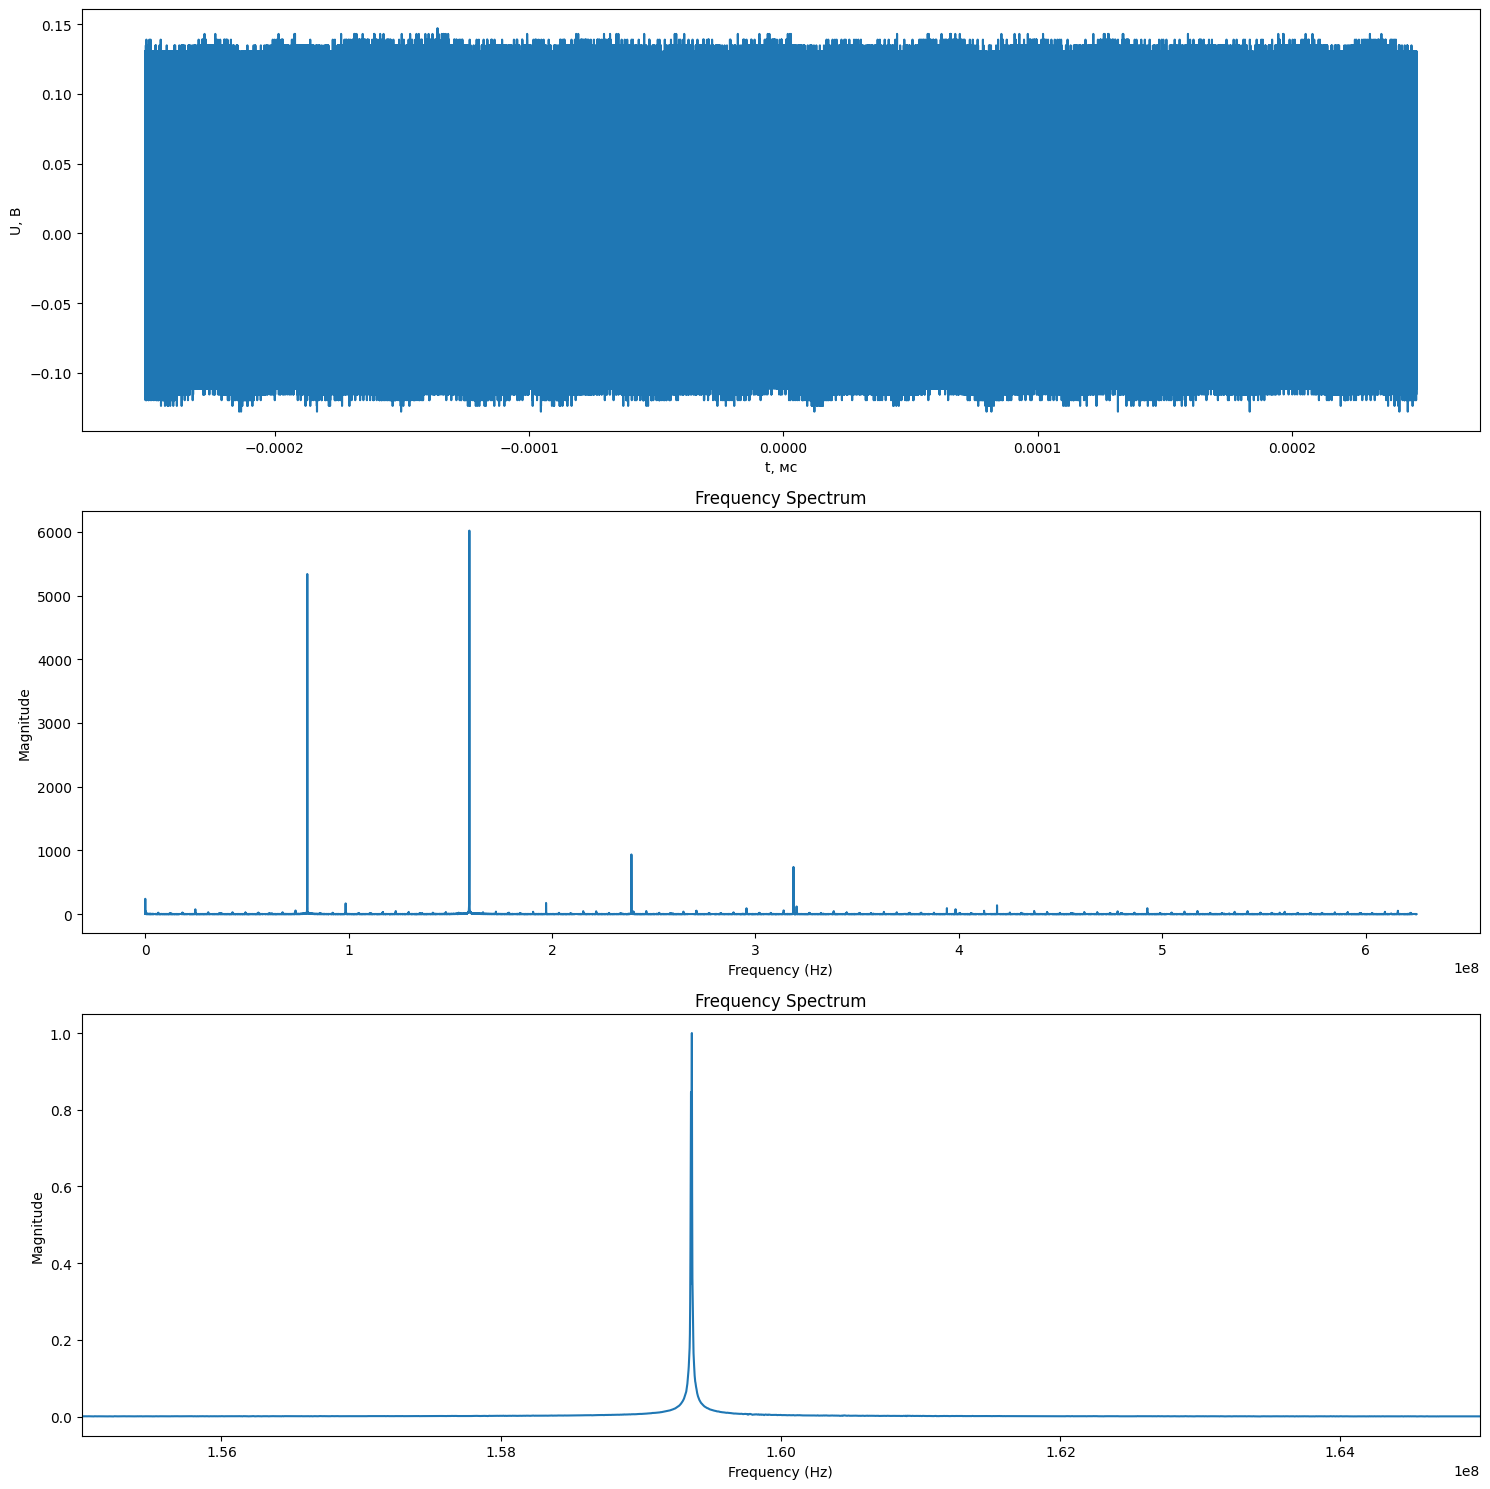

"fwhm = []\nfor i in range(len(spectr1_new)):\n    if (Spectr1_spl_norm[i] - 0.5) > 0:\n        fwhm.append(spectr1_new[i])\n        #print(Spectr1_spl_norm[i], spectr1_new[i])\nprint('FWHM в кГц' ,(np.array(fwhm)[-1] - np.array(fwhm)[0])/1e3 )\n\nFwhm = []\nfor i in range(len(Spectr1_new)):\n    if (SPectr1_spl_norm[i] - 0.5) > 0:\n        Fwhm.append(Spectr1_new[i])\n        #print(Spectr1_spl_norm[i], spectr1_new[i])\nprint('FWHM в кГц' ,(np.array(Fwhm)[-1] - np.array(Fwhm)[0])/1e3 )"

In [3]:
from scipy.ndimage import gaussian_filter1d
import math
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks
df = pd.read_csv('50mks0.csv')
#spectr1 = np.arange(-0.04999, 0.0500099, 1e-7)
spectr1 = np.array(df.iloc[:,0])
Spectr1 = np.array(df.iloc[:,1])
spectr1 = np.linspace(-2.5100E-04, 2.4900E-04, 625000)

dt = spectr1[1] - spectr1[0]
fs = 1/dt
fft_signal = np.fft.fft(Spectr1)
freq = np.fft.fftfreq(len(Spectr1), d = dt)
fft_signal = fft_signal[:len(fft_signal)//2-1]
freq = freq[freq>0]

sigma = 1.0
filtered_signal = gaussian_filter1d(fft_signal, sigma)
filtered_signal_norm = np.abs(filtered_signal)/max(abs(filtered_signal))

Freq = []
Fft_signal = []
for i in range(len(freq)):
    if (freq[i]>230e6) and (freq[i]<250e6):
        Freq.append(freq[i])
        Fft_signal.append(filtered_signal[i])
#print(Freq)
'''Spl1 = interp1d(np.array(Freq), np.array(Fft_signal), kind='cubic')
spectr1_new = np.linspace(Freq[0], Freq[-1])
Spectr1_spl = Spl1(spectr1_new)'''


fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))  # два графика вертикально
ax[0].plot(spectr1, Spectr1)
#plt.xticks(np.arange(min(spectr1_new) , max(spectr1_new),100))
ax[0].set_xlabel('t, мс')
ax[0].set_ylabel('U, В')

ax[1].plot(freq, np.abs(filtered_signal))
#ax[1].set_xlim(0, fs/2)  # отображение только положительных частот
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude')
ax[1].set_title('Frequency Spectrum')

v = 2.5*1e-3
Lambda = 1550e-9
fS =  2 * v /Lambda
#print(fS)
#for i in range(len(freq)):
    #if abs(freq[i] - fS) < 1000:
        #print(freq[i])
        #print(fft_signal[i])
#3225.8064516129034
ax[2].plot(freq, np.abs(filtered_signal)/max(abs(filtered_signal)))
ax[2].set_xlim(155e6, 165e6)  # отображение только положительных частот
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Magnitude')
ax[2].set_title('Frequency Spectrum')

fwhm = []
for i in range(len(Freq)):
    if ((np.array(Fft_signal)[i])/(max(np.array(Fft_signal))) - 0.5) > 0:
        fwhm.append(Freq[i])
        #print(Spectr1_spl_norm[i], spectr1_new[i])
print(fwhm)
print('FWHM в кГц' ,(np.array(fwhm)[-1] - np.array(fwhm)[0])/1e3 )

'''fft_signal_norm = abs(fft_signal)/max(abs(fft_signal))
Spectr1_spl_norm = np.abs(Spectr1_spl)/max(np.abs(Spectr1_spl))
#print(299769)'''
'''ax[3].plot(spectr1_new, Spectr1_spl_norm)
#ax[3].axvline(x = 298268.44159920904, color='k', linestyle='-')
ax[3].set_xlim(155e6, 165e6)  # отображение только положительных частот
ax[3].set_xlabel('Frequency (Hz)')
ax[3].set_ylabel('Magnitude')
ax[3].set_title('Frequency Spectrum')'''

'''FReq = []
FFt_signal = []
for i in range(len(freq)):
    if (freq[i]>235e6) and (freq[i]<245e6):
        FReq.append(freq[i])
        FFt_signal.append(fft_signal[i])'''

'''SPl1 = interp1d(np.array(FReq), np.array(FFt_signal), kind='cubic')
Spectr1_new = np.linspace(FReq[0], FReq[-1])
SPectr1_spl = SPl1(Spectr1_new)
SPectr1_spl_norm = np.abs(SPectr1_spl)/max(np.abs(SPectr1_spl))'''

'''ax[4].plot(Spectr1_new, SPectr1_spl_norm, 'r-')
ax[4].set_xlabel('ν, MГц')
ax[4].set_ylabel('P')
ax[4].set_title('')'''

plt.tight_layout()
plt.show()

# Поиск пиков
peaks, _ = find_peaks(abs(fft_signal))

# Определение максимального пика
max_peak_index = peaks[np.argmax(abs(fft_signal[peaks]))]

# Значение по оси x для максимального пика
max_x_value = freq[max_peak_index]
#print(f'Максимум спектра находится в точке x = {max_x_value:.4f}')

'''fwhm = []
for i in range(len(spectr1_new)):
    if (Spectr1_spl_norm[i] - 0.5) > 0:
        fwhm.append(spectr1_new[i])
        #print(Spectr1_spl_norm[i], spectr1_new[i])
print('FWHM в кГц' ,(np.array(fwhm)[-1] - np.array(fwhm)[0])/1e3 )

Fwhm = []
for i in range(len(Spectr1_new)):
    if (SPectr1_spl_norm[i] - 0.5) > 0:
        Fwhm.append(Spectr1_new[i])
        #print(Spectr1_spl_norm[i], spectr1_new[i])
print('FWHM в кГц' ,(np.array(Fwhm)[-1] - np.array(Fwhm)[0])/1e3 )'''
